In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
import pandas as pd
df = pd.read_csv("/root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# get the number of rows in each column and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check for NaN values in each column
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# get the values and their counts in each column
for column in df.columns:
  print(df[column].value_counts(),end="\n")
  print("-"*45,end="\n")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
---------------------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
---------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
---------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
---------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
---------------------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
---------------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-------------------------------------

## The information about the dataset:

### Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Columns:

- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

In [ ]:
# identify the columns that should or already have numeric values
numeric_cols=["tenure","MonthlyCharges","TotalCharges"]
# identify categorical columns
categorical_cols=list(set(df.columns)-set(numeric_cols)-{"customerID"})

# change the data type of "TotalCharges" to numeric data (int64 or float64)
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")# if parsing returns an error then give their value as "NaN"
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# remove the rows with NaN value
df.dropna(inplace=True)
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

class_df=df.copy() # make a copy of the dataset to use for classification

print('Label Encoder Transformation: \n')
for i in categorical_cols :
    class_df[i] = le.fit_transform(class_df[i])
    print(f"{i} : {class_df[i].unique()} = {le.inverse_transform(class_df[i].unique())}")# inverse_transform() transforms labels back to original encoding

Label Encoder Transformation: 

PaperlessBilling : [1 0] = ['Yes' 'No']
InternetService : [0 1 2] = ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 2 1] = ['No' 'Yes' 'No internet service']
Dependents : [0 1] = ['No' 'Yes']
gender : [0 1] = ['Female' 'Male']
TechSupport : [0 2 1] = ['No' 'Yes' 'No internet service']
Contract : [0 1 2] = ['Month-to-month' 'One year' 'Two year']
StreamingMovies : [0 2 1] = ['No' 'Yes' 'No internet service']
MultipleLines : [1 0 2] = ['No phone service' 'No' 'Yes']
Partner : [1 0] = ['Yes' 'No']
DeviceProtection : [0 2 1] = ['No' 'Yes' 'No internet service']
PaymentMethod : [2 3 0 1] = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
OnlineBackup : [2 0 1] = ['Yes' 'No' 'No internet service']
StreamingTV : [0 2 1] = ['No' 'Yes' 'No internet service']
Churn : [0 1] = ['No' 'Yes']
PhoneService : [0 1] = ['No' 'Yes']
SeniorCitizen : [0 1] = [0 1]


In [ ]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

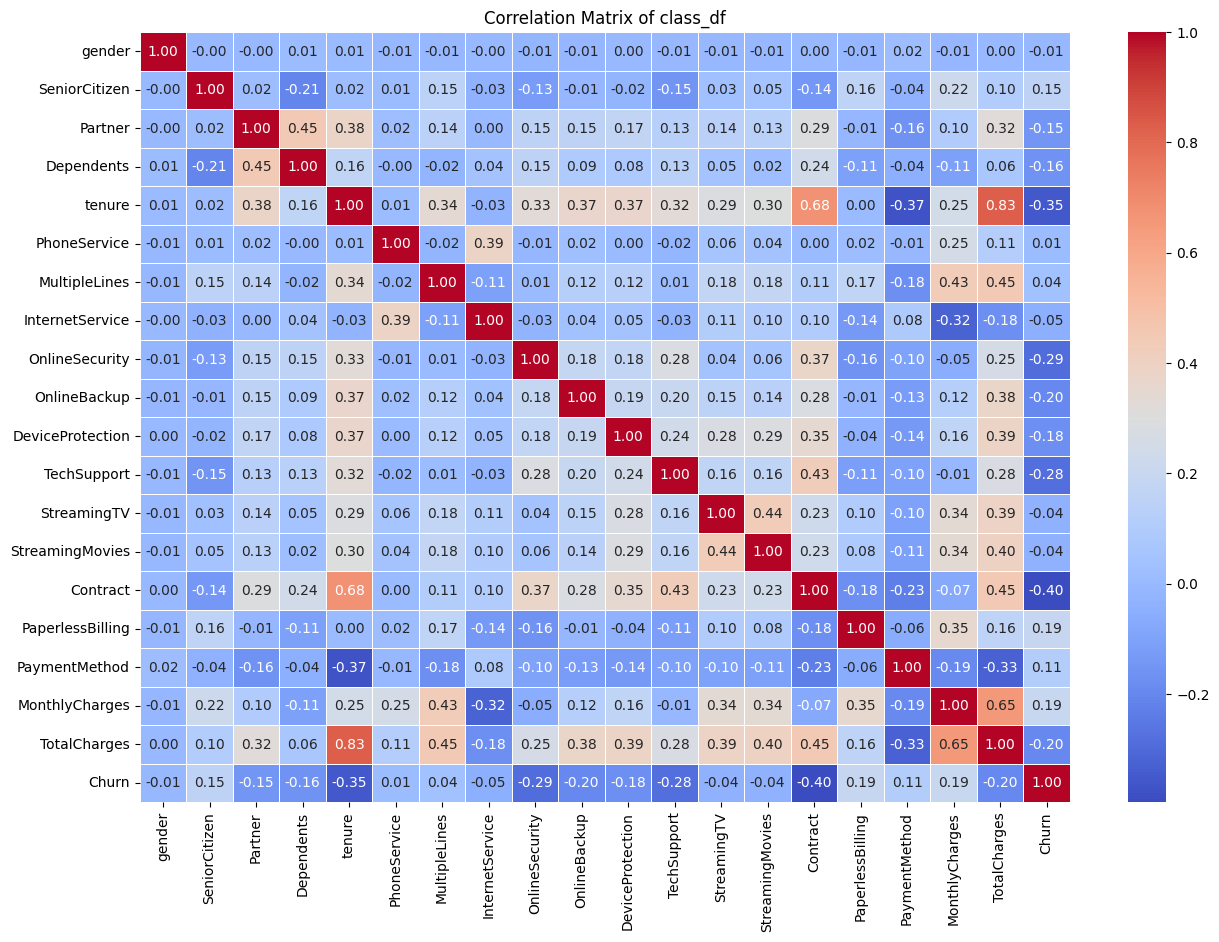

In [ ]:
# Drop the 'customerID' column before calculating the correlation matrix
class_df=class_df.drop(columns=['customerID'])

# Calculate the correlation matrix
correlation_matrix = class_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15,10))

# Draw the heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of class_df')
plt.show()

# Exploratory Data Analysis (EDA)

1. Customer Demographics

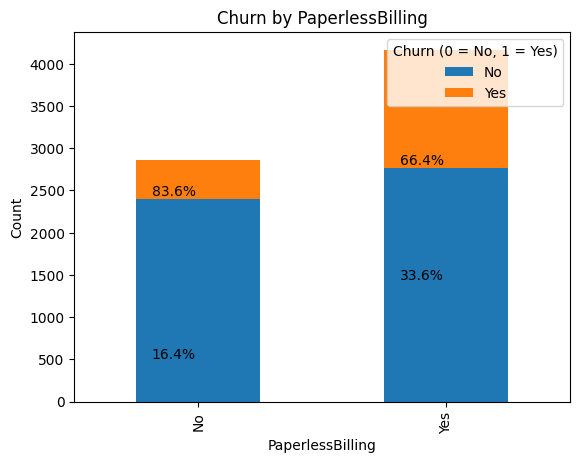

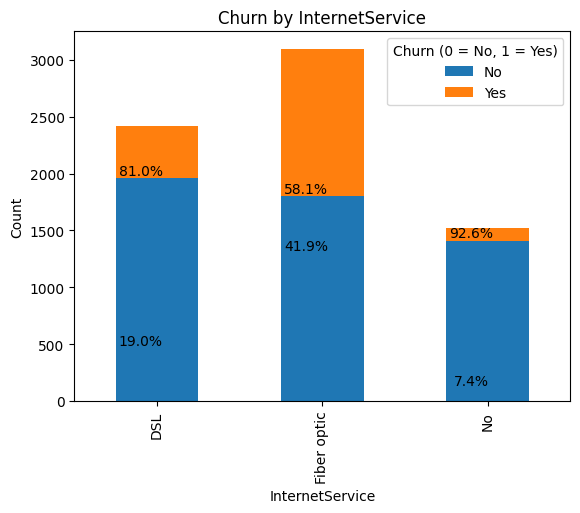

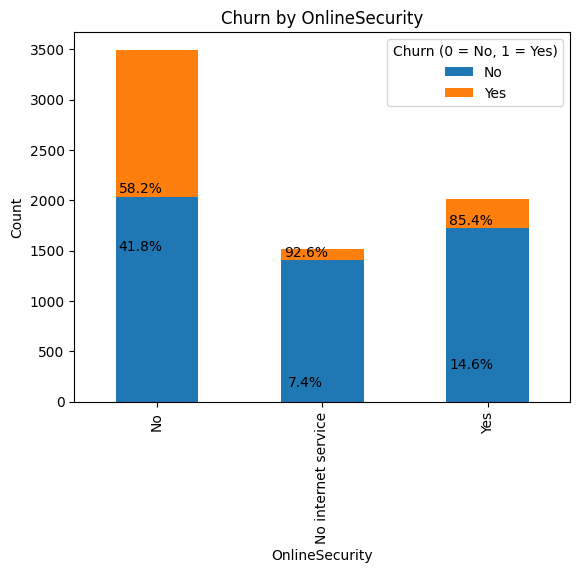

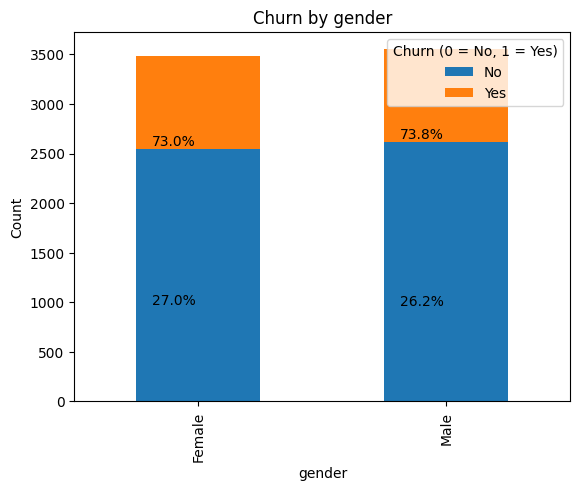

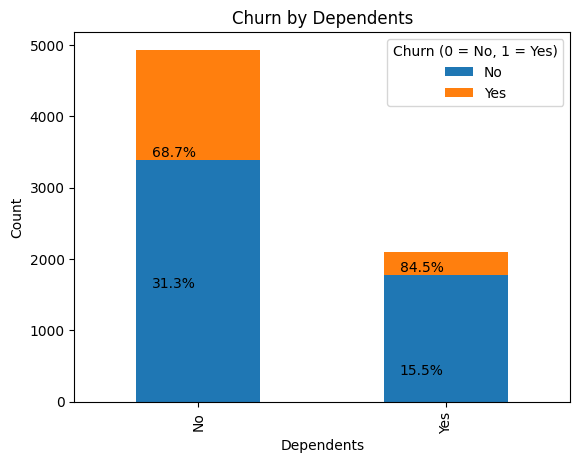

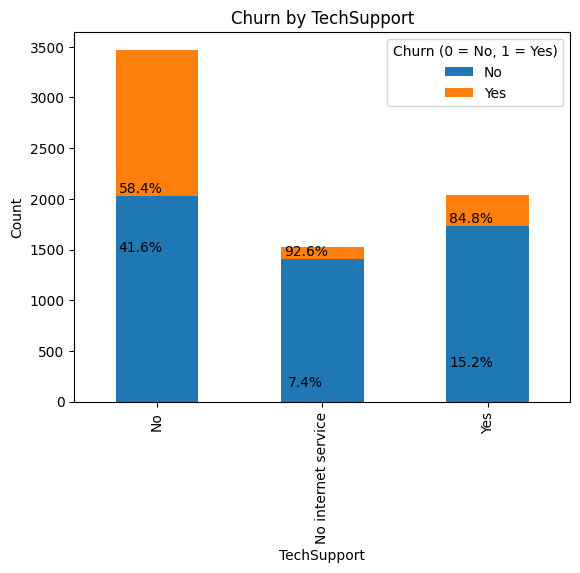

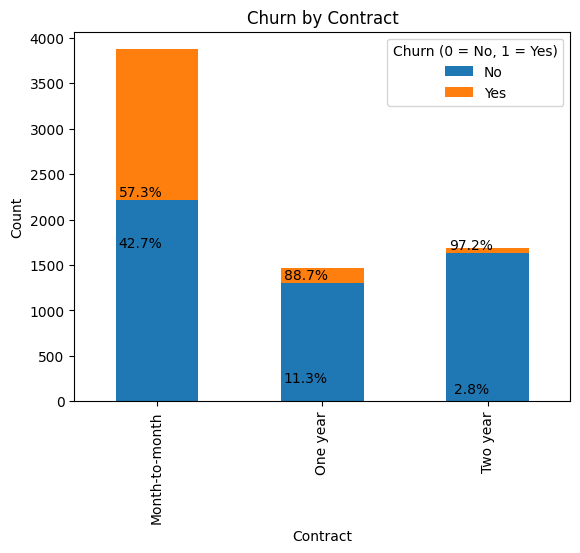

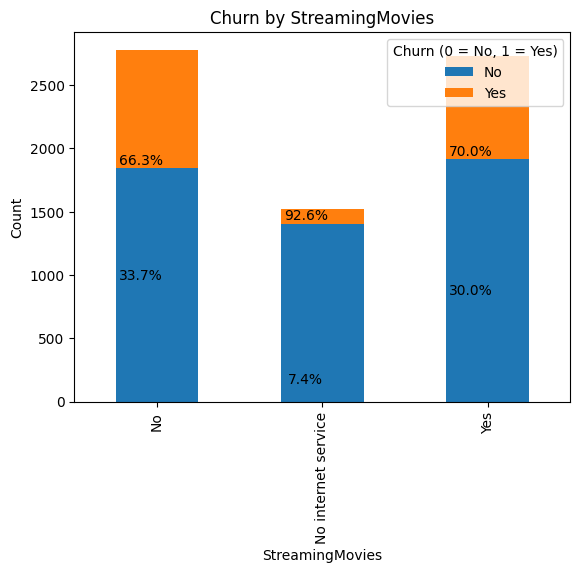

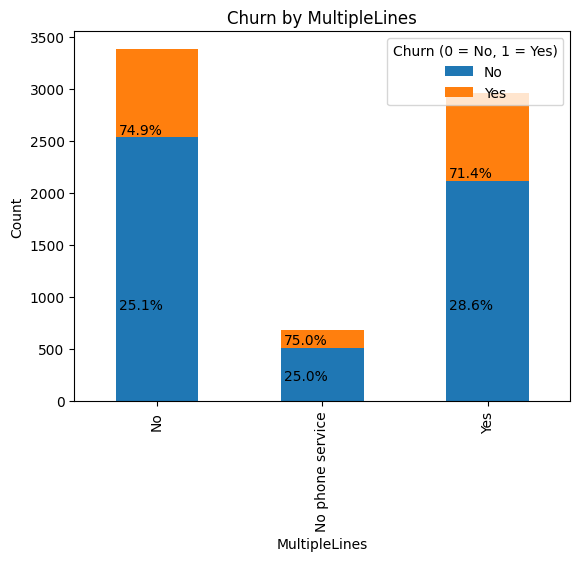

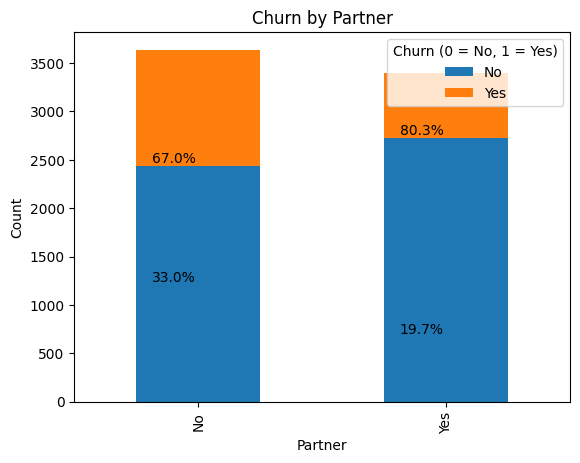

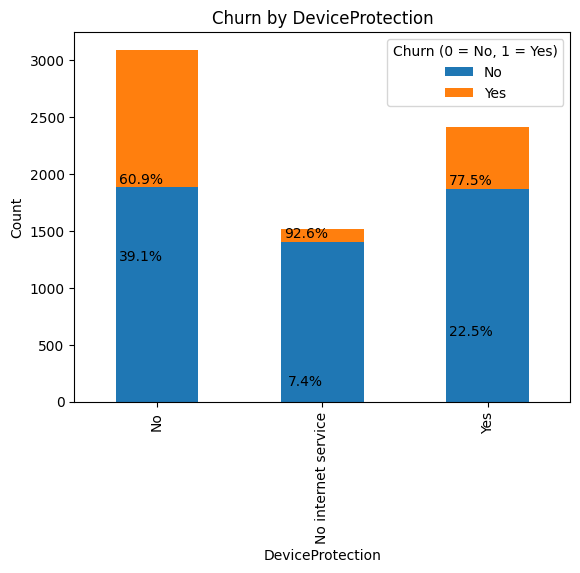

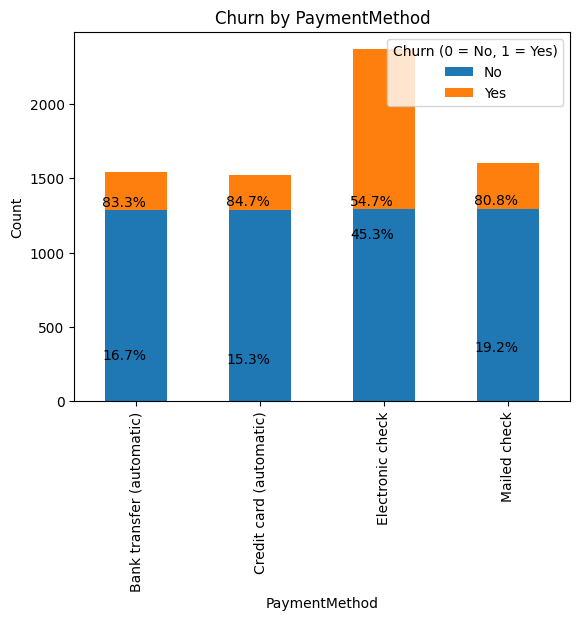

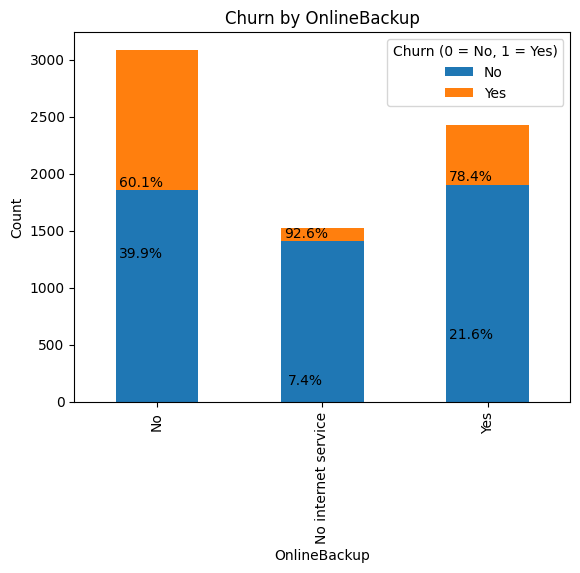

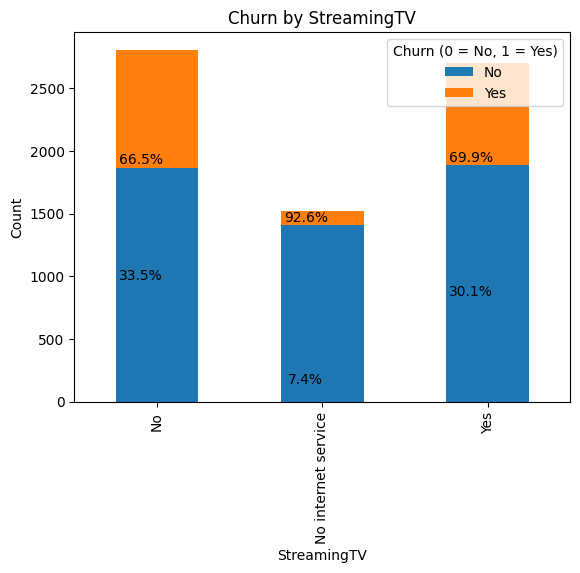

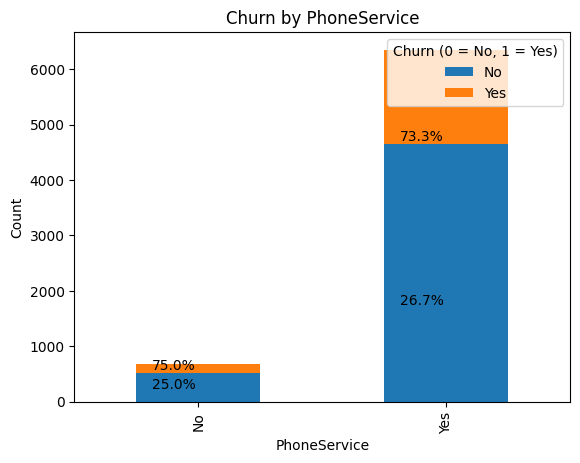

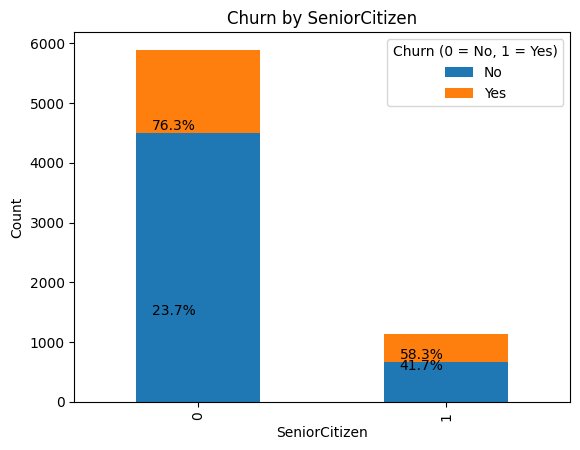

In [ ]:
def plot_categorical_feature_vs_churn(df, feature):
    feature_churn_counts = df.groupby([feature, 'Churn']).size().unstack()

    # Calculate percentages
    feature_churn_perc = feature_churn_counts.div(feature_churn_counts.sum(axis=1), axis=0) * 100

    # Create the plot
    fig, ax = plt.subplots()
    feature_churn_counts.plot(kind='bar', stacked=True, ax=ax)

    # Add percentage labels to the bars
    for i in range(len(feature_churn_counts.index)):
        for j in range(feature_churn_counts.shape[1]):
            plt.text(i - 0.1, feature_churn_counts.iloc[i, j] + 5, f"{feature_churn_perc.iloc[i, j]:.1f}%", ha='center', va='bottom')

    plt.title(f"Churn by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Churn (0 = No, 1 = Yes)", loc='upper right')
    plt.show()


for feature in list(set(categorical_cols)-{"Churn"}):
    plot_categorical_feature_vs_churn(df, feature)

### Inference from the EDA:

1. Gender: Churn rate for both males and females seems nearly the same. Thus, gender is not an important churn variable.

2. Senior Citizen: Senior citizens have a more critical churn rate than the rest of the customers. This important demographic requires special attention and most likely targeted retention strategies.

3. Partner: Customers with partners churn less than customers who don't have any partners. This means that a partner can contribute to loyalty.

4. Dependents: In addition, similar to partners, customers with dependents tend to churn less often than those who don't have dependents. This further reinforces the notion of family ties contributing to customer retention.

5. Phone Service: An obvious absence of impact on churn rates appears with having a phone service. A bit lower churn rate is being observed for a customer, who is not covered under phone service. This needs further analysis.

6. Multiple Lines: The churn rate is slightly higher for customers with multiple lines. Perhaps, it makes the task of managing more than one line look cumbersome or unnecessary for some.

7. Internet Service: The customers with a fiber optic internet service have the highest churn rate, followed by DSL. Those who do not have the internet service have the lowest churn. This suggests that Fiber optic customers might be needing more attention towards their satisfaction issues.

8. Online Security: Customers not having online security leave the company in large numbers compared to those with online security or no internet service. This translates to promotion of online security features to retain a customer.

9. Online Backup: Like online security, there are more customers who are keen on leaving their network when they have less online backup than those with it.

10. Device Protection: Customers who do not have device protection churn more frequently than those who do. This indicates a potential need to emphasize the benefits of device protection to customers.

11. Tech Support: Lack of tech support is linked to higher churn rates. Customers without tech support are more likely to churn compared to those with it or no internet service.

12. Streaming TV: Customers with streaming TV service are at a greater risk of churn than those who do not use this service. Further analysis in required on how and why such trend is occurring.

13. Streaming Movies: Like streaming TV, having streaming movies is associated with a slightly higher risk of churning. Perhaps again it is part of the broader satisfaction with streaming.

14. Contract: Customers who have month-to-month contract churn much more compared to customers having either one year or two-year contracts. This makes sense because customers who have shorter contracts have much more flexibility to switch providers.

15. Paperless Billing: Customers with paperless billing have a higher churn rate than that of regular billing customers. This one needs deeper analysis as to why the customer prefers his billing in this manner.

16. Payment Method: The highest churn rate has been recorded for a payment method called electronic checks. Lowest churn rates are noted among customers who prefer mailing checks, bank transfers, or credit cards.

#Classification

We will apply:
*   logistic regression Decision
*   Naive Bayes
*   KNN
*   linear SVM
*   Kernel SVM
*   Decision Trees
*   Basic neural networks

In [ ]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [ ]:
# Split data into X & y
X = class_df.drop("Churn", axis=1) # use all columns except Churn
y = class_df["Churn"] # we want to predict y using X

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models with hyperparameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "Linear SVM": {
        "model": LinearSVC(),
        "params": {
            "C": [0.1, 1, 10]
        }
    },
    "Kernel SVM": {
        "model": SVC(C=1.0, kernel="rbf", gamma="scale"),  # Fixed configuration
        "params": None  # No hyperparameter tuning

    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(max_iter=1000),
        "params": {
            "hidden_layer_sizes": [(10,), (50,), (100,)],
            "activation": ["relu", "tanh"],
            "solver": ["adam", "sgd"]
        }
    }
}

# Train and evaluate models
for name, cfg in models.items():
    print(f"Training {name}...")
    if name == "Kernel SVM":
        # Directly train and evaluate the Kernel SVM model
        model = cfg["model"]
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on the test set
    else:
        # Perform hyperparameter tuning for other models
        grid_search = GridSearchCV(cfg["model"], cfg["params"], cv=3, n_jobs=-1, scoring="accuracy") if cfg["params"] else cfg["model"]
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_ if cfg["params"] else grid_search
        y_pred = model.predict(X_test)


    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1 Score: {f1*100:.2f}%")
    print("-" * 80)


Training Logistic Regression...
Accuracy: 78.89%, Precision: 77.85%, Recall: 78.89%, F1 Score: 78.14%
--------------------------------------------------------------------------------
Training Naive Bayes...
Accuracy: 73.92%, Precision: 78.34%, Recall: 73.92%, F1 Score: 75.14%
--------------------------------------------------------------------------------
Training KNN...
Accuracy: 77.40%, Precision: 75.75%, Recall: 77.40%, F1 Score: 75.96%
--------------------------------------------------------------------------------
Training Linear SVM...
Accuracy: 78.54%, Precision: 77.45%, Recall: 78.54%, F1 Score: 77.75%
--------------------------------------------------------------------------------
Training Kernel SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 73.42%, Precision: 53.90%, Recall: 73.42%, F1 Score: 62.17%
--------------------------------------------------------------------------------
Training Decision Tree...
Accuracy: 78.82%, Precision: 77.44%, Recall: 78.82%, F1 Score: 77.56%
--------------------------------------------------------------------------------
Training Neural Network...
Accuracy: 78.61%, Precision: 77.18%, Recall: 78.61%, F1 Score: 76.01%
--------------------------------------------------------------------------------


# Regression

We will apply:
- linear regression,
- random forests,
- extra random trees,
- AdaBoost,
- XGBoost,
- and NGBoost


In [ ]:
!pip install --upgrade ngboost

In [ ]:
# we will use dataset without any NaN values and without categorical attributes
reg_df=df[numeric_cols]
reg_df.info()

In [ ]:
# scale the dataset
from sklearn.preprocessing import StandardScaler

# scale the dataset
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(reg_df), columns=numeric_cols)
scaled_data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# define X and y
X=scaled_data.drop(columns=["TotalCharges"])
y=scaled_data["TotalCharges"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "NGBoost": NGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name}->  RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")

# Clustering

We will apply:


In [ ]:
!pip install scikit-learn-extra

In [ ]:
# prepare data for clustering

clus_df=class_df.copy()
scaled_data = pd.DataFrame(scaler.fit_transform(clus_df), columns=class_df.columns)
scaled_data

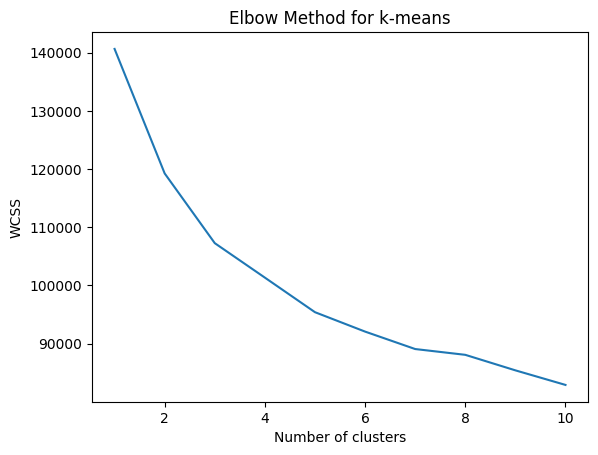

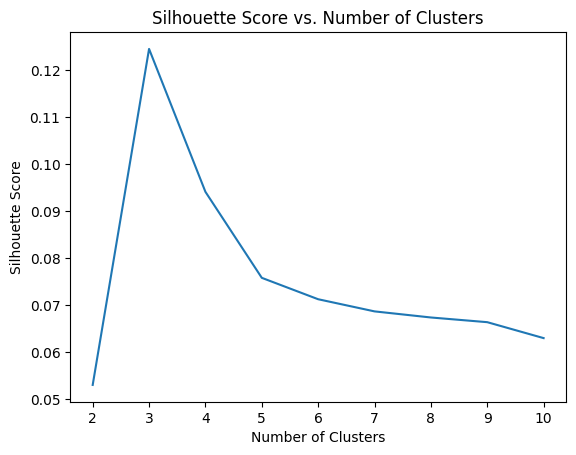

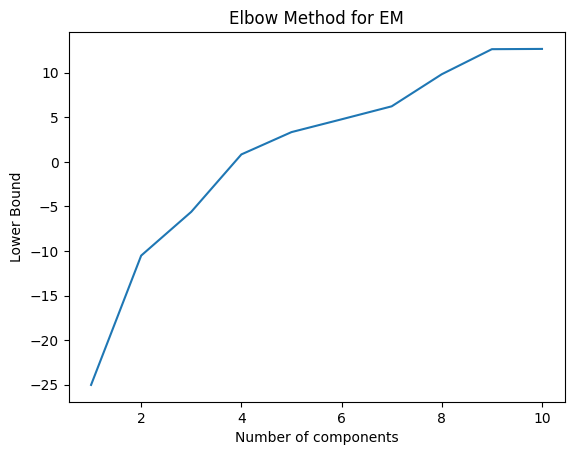

In [ ]:
from sklearn.cluster import  KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids

# Elbow method for k-means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for k-means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Elbow method for k-medoid
silhouette_scores = []
for k in range(2, 11):  # Adjust the range as needed
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(scaled_data)
    labels = kmedoids.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# Elbow method for EM
wcss_em = []
for i in range(1, 11):
    em = GaussianMixture(n_components=i, random_state=42)
    em.fit(scaled_data)
    wcss_em.append(em.lower_bound_)

plt.plot(range(1, 11), wcss_em)
plt.title('Elbow Method for EM')
plt.xlabel('Number of components')
plt.ylabel('Lower Bound')
plt.show()

In [ ]:
# K-Means
optimal_k=4 # from elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels_km = kmeans.labels_

# EM
optimal_k=7 # from elbow method
em = GaussianMixture(n_components=optimal_k, random_state=42)
em.fit(scaled_data)
labels_em = em.predict(scaled_data)

# K-Medoids
optimal_k=3 # from elbow method
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(scaled_data)
labels_kmd = kmedoids.labels_

# Evaluate k-medoids clusters
sse = kmedoids.inertia_
silhouette = silhouette_score(scaled_data, labels_kmd)
davies_bouldin = davies_bouldin_score(scaled_data, labels_kmd)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels_kmd)

print("K-Medoids:")
print("SSE:", sse)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)
print()

# Evaluate k-means clusters
sse = kmeans.inertia_
silhouette = silhouette_score(scaled_data, labels_km)
davies_bouldin = davies_bouldin_score(scaled_data, labels_km)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels_km)

print("K-Means:")
print("SSE:", sse)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)
print()

# Evaluate em clusters
aic = em.aic(scaled_data)
bic = em.bic(scaled_data)
silhouette = silhouette_score(scaled_data, labels_em)
davies_bouldin = davies_bouldin_score(scaled_data, labels_em)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels_em)

print("EM:")
print("AIC:", aic)
print("BIC:", bic)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

K-Medoids:
SSE: 31577.207144960856
Silhouette Score: 0.12447596117702545
Davies-Bouldin Index: 2.301171354109196
Calinski-Harabasz Index: 984.430510752161

K-Means:
SSE: 101336.1934300835
Silhouette Score: 0.14422772916100532
Davies-Bouldin Index: 2.439360436705227
Calinski-Harabasz Index: 908.6177945101595

EM:
AIC: -84320.32977081953
BIC: -73237.43584480567
Silhouette Score: 0.07525103905434366
Davies-Bouldin Index: 2.623149725263932
Calinski-Harabasz Index: 536.7799858633796
